In [2]:
import subprocess
import numpy as np
import mdtraj as md
import time
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%pylab inline

#runs/clones are indexed
nruns = 150
nclones = 40
trajs = []
#some .xtc files list a negative trajectory length, appending here for now
bad_trajs_run = []
bad_trajs_clone = []

gro_reference = '/home/karl/VoelzLab/ProteinG/gro/p8600/protein_only.gro'
traj_references = '/media/karl/VAV6/PROJ8600/RUN%d/CLONE%d/frame%d.xtc'


#Since we want only trajectory length, load last .xtc in every RUN/CLONE, append .time[-1] to empty list
#.xtc files with bad traj. lengths appended to different empty list for reference
for run in tqdm_notebook(range(nruns),desc='Loading Trajs'):
    time.sleep(0.01)
    for clone in range(nclones):
        nframes = int(subprocess.check_output('ls /media/karl/VAV6/PROJ8600/RUN%d/CLONE%d/frame*.xtc | wc -l'% (run,clone),shell=True))
        if nframes >= 1:
            frame=nframes-1
            loadtrajs = md.load(traj_references%(run,clone,(frame)),top=gro_reference).time[-1]
            if loadtrajs >= 0:
                trajs.append(loadtrajs)
            else:
                bad_trajs_run.append(run)
                bad_trajs_clone.append(clone)

Populating the interactive namespace from numpy and matplotlib



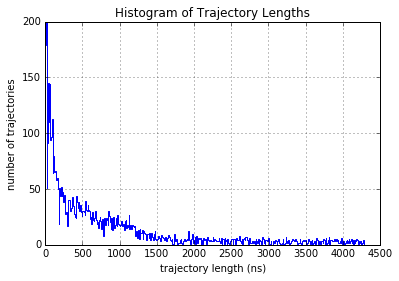

Total Trajectories: 6000
Number of Bad Trajectories: 275
Number of CLONES with no trajectories: 122

Longest Trajectory length: 4290 ns
Average Trajectory Length: 419 ns


In [3]:
#1 ps = 1E-03 ns
ns = 0.001
#np.array of traj lengths -> [ 1550.   830.   210. ...,  1190.   580.   870.]
traj_lengths = [ns*float(t) for t in trajs]

#bins -> trajectories with x length [0.0, 10.0. 15.0 ..., 4300]
#counts -> number of trajectories with x length (ie there are 177 clones that have a max traj. length of 10.0 ns )
bins = np.arange(0,4320,10)
counts, bins = np.histogram(traj_lengths,bins)


#to get correct indexing range for both counts/bins, otherwise plt.step(x,y) gives dimension error
#4300 ns is longest traj -> last bin at 4300
final_bins = np.arange(0,4310,10)
counts1 = []
for i in range(len(bins)-1):
    counts1.append(counts[i])
final_counts = [counts1[i].astype(int) for i in range(len(bins)-1)]

#Average Trajectory Length for PROJ6391
midpoint = [0.5*i for i in final_bins] #first get average of bin width
avg = sum([int(final_counts[i]*midpoint[i]) for i in range(len(midpoint)-1)])/sum(final_counts) #avg. bin width*count length/total counts

# Longest traj. Length
trajs.sort()
longest_traj_len = trajs[-1]

#CLONES with no Trajs.
zerotrajs = (nruns*nclones)-(len(bad_trajs_clone)+len(trajs))

#Histogram
plt.figure()
plt.step(final_bins,final_counts)
plt.xlabel('trajectory length (ns)')
plt.ylabel('number of trajectories')
plt.title("Histogram of Trajectory Lengths")
plt.axis([0,4500,0,200])
plt.grid(True)
plt.show()
plt.savefig('TrajLengthPROJ8600')
print "Total Trajectories: %d" % (nruns*nclones)
print "Number of Bad Trajectories: %d" % len(bad_trajs_clone)
print "Number of CLONES with no trajectories: %d" % zerotrajs
print
print "Longest Trajectory length: %d ns" % (longest_traj_len*ns)
print "Average Trajectory Length: %d ns" % avg
